In [2]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.conv_learner import *

In [8]:
# # Check the current directory
# print('The Current Working directory is : ', os.getcwd()) #/content/clouderizer/fast.ai/fastai/courses/dl1
# # Change the directory, where you want to download the dataset
# directory = '/content/clouderizer/fast.ai/fastai/courses/dl1/data/planet'
# if not os.path.exists(directory):
#     os.makedirs(directory)
# os.chdir(directory)

# # https://stackoverflow.com/questions/273192/how-can-i-safely-create-a-nested-directory-in-python
# # https://stackoverflow.com/questions/431684/how-do-i-change-directory-cd-in-python

# # Need to install kaggle everytime and move the file to .kaggle folder.
# !pip install kaggle
# !touch '/content/.kaggle/kaggle.json'
# !chmod 600 /content/.kaggle/kaggle.json
# os.rename('/content/clouderizer/fast.ai/fastai/courses/dl1/kaggle.json', '/content/.kaggle/kaggle.json')
# import kaggle
# !kaggle competitions download -c planet-understanding-the-amazon-from-space --force

# # Once done change the directory back again to the original directory
# os.chdir('/content/clouderizer/fast.ai/fastai/courses/dl1')

# # Check whether the directory has been changed or not
# print(os.getcwd())

# # Create the model and tmp folder for further use
# os.makedirs('data/planet/models', exist_ok=True)
# os.makedirs('data/planet/tmp', exist_ok=True)

 96%|███████████████████████████████████████▌ | 579M/600M [00:03<00:00, 201MB/s]
100%|████████████████████████████████████████| 600M/600M [00:09<00:00, 67.2MB/s]
 98%|████████████████████████████████████████▎| 593M/603M [00:03<00:00, 168MB/s]
100%|████████████████████████████████████████| 603M/603M [00:08<00:00, 75.7MB/s]
100%|██████████████████████████████████████▉| 12.9G/12.9G [01:42<00:00, 177MB/s]
100%|███████████████████████████████████████| 12.9G/12.9G [01:53<00:00, 122MB/s]
 13%|████▉                                 | 2.52G/19.4G [00:30<05:35, 54.2MB/s]^C
 13%|████▉                                 | 2.54G/19.4G [00:34<03:47, 79.9MB/s]
User cancelled operation
/content/clouderizer/fast.ai/fastai/courses/dl1


In [10]:
# os.chdir('/content/clouderizer/fast.ai/fastai/courses/dl1/data/planet')
# !7za x train-jpg.tar.7z
# !tar xf train-jpg.tar

# !7za x test-jpg.tar.7z
# !tar xf test-jpg.tar

# os.chdir('/content/clouderizer/fast.ai/fastai/courses/dl1')


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=C.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Sca        1 file, 629296207 bytes (601 MiB)

Extracting archive: train-jpg.tar.7z
--
Path = train-jpg.tar.7z
Type = 7z
Physical Size = 629296207
Headers Size = 98
Method = LZMA2:24
Solid = -
Blocks = 1

      0% - train-jpg.t                    1% - train-jpg.t                    2% - train-jpg.t                    3% - train-jpg.t                    4% - train-jpg.t                    5% - train-jpg.t                    6% - train-jpg.t                    7% - train-jpg.t                    8% - train-jpg.t                    9% - train-jpg.t                   10% - train-jpg.t                   11% - train-jpg.t                   12% - train-jpg.t                   13% - train-jpg.t                   14% - train-jpg.t                   15% - train-jpg

In [11]:
PATH = 'data/planet/'

In [12]:
ls {PATH}

models/       test-jpg.tar.7z     train-jpg/        train-tif-v2.tar.7z
test-jpg/     test-tif-v2.tar.7z  train-jpg.tar
test-jpg.tar  tmp/                train-jpg.tar.7z


In [13]:
from fastai.plots import *

In [14]:
def get_1st(path):
    return glob(f'{path}/*.*')[0]

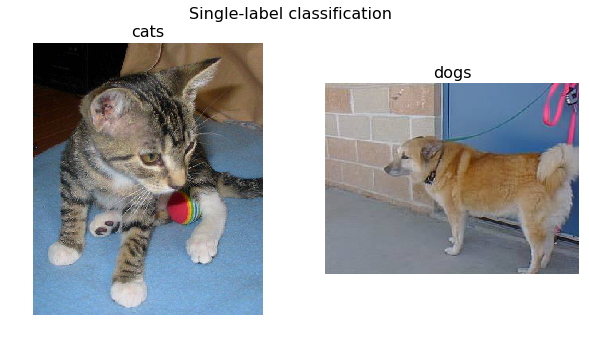

In [15]:
dc_path = 'data/dogscats/valid/'
list_paths = [get_1st(f'{dc_path}cats'), get_1st(f'{dc_path}dogs')]
plots_from_files(list_paths, titles=['cats', 'dogs'], maintitle="Single-label classification")

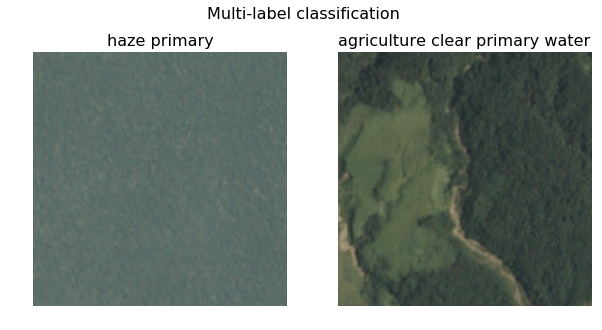

In [16]:
list_paths = [f"{PATH}train-jpg/train_0.jpg", f"{PATH}train-jpg/train_1.jpg"]
titles=["haze primary", "agriculture clear primary water"]
plots_from_files(list_paths, titles=titles, maintitle="Multi-label classification")

In [17]:
from planet import f2

In [18]:
metrics=[f2]
f_model = resnet34

In [20]:
label_csv = f'{PATH}train_v2.csv'
n = len(list(open(label_csv))) - 1
val_idxs = get_cv_idxs(n)

In [21]:
n

40479

In [22]:
len(val_idxs)

8095

In [23]:
def get_data(sz):
    tfms = tfms_from_model(f_model, sz, aug_tfms=transforms_top_down, max_zoom=1.05)
    return ImageClassifierData.from_csv(PATH, 'train-jpg', label_csv, 
                                        tfms=tfms, suffix='.jpg', val_idxs=val_idxs, test_name='test-jpg')

In [24]:
data = get_data(256)

In [25]:
x, y = next(iter(data.val_dl))

In [26]:
y


    1     0     0  ...      0     0     1
    0     0     0  ...      0     0     0
    1     0     0  ...      0     0     0
       ...          ⋱          ...       
    1     0     0  ...      0     0     1
    0     0     0  ...      0     0     0
    0     0     0  ...      0     0     1
[torch.cuda.FloatTensor of size 64x17 (GPU 0)]

In [30]:
list(zip(data.classes, y[0]))

[('agriculture', 1.0),
 ('artisinal_mine', 0.0),
 ('bare_ground', 0.0),
 ('blooming', 0.0),
 ('blow_down', 0.0),
 ('clear', 1.0),
 ('cloudy', 0.0),
 ('conventional_mine', 0.0),
 ('cultivation', 0.0),
 ('habitation', 0.0),
 ('haze', 0.0),
 ('partly_cloudy', 0.0),
 ('primary', 1.0),
 ('road', 0.0),
 ('selective_logging', 0.0),
 ('slash_burn', 0.0),
 ('water', 1.0)]

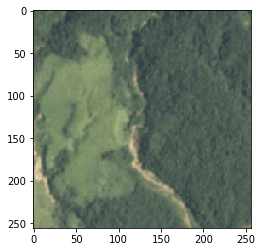

In [32]:
plt.imshow(data.val_ds.denorm(to_np(x))[0]*1.4)

In [35]:
sz = 64
data = get_data(64)
data = data.resize(int(sz*1.3), 'tmp')

In [36]:
learn = ConvLearner.pretrained(f_model, data, metrics=metrics)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /content/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:02<00:00, 39780835.04it/s]


epoch      trn_loss   val_loss   f2         
    0      0.217013   0.348388   0.799695  



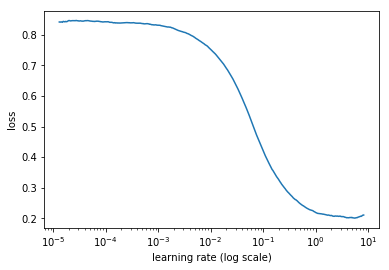

In [37]:
lrf = learn.lr_find()
learn.sched.plot()

In [38]:
lr = 2
learn.fit(lr, n_cycle=3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.139151   0.132439   0.882824  
    1      0.143403   0.130871   0.881208  
    2      0.13326    0.125373   0.889497  
    3      0.142364   0.130362   0.88647   
    4      0.135518   0.125268   0.890539  
    5      0.130822   0.122537   0.894115  
    6      0.130196   0.121243   0.895849  



[array([0.12124]), 0.8958486042914516]

In [39]:
lrs = np.array([lr/9, lr/3, lr])
learn.unfreeze()
learn.fit(lrs, n_cycle=3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.133982   0.122201   0.896034  
    1      0.13171    0.121049   0.90047   
    2      0.115169   0.108551   0.90945   
    3      0.129485   0.131419   0.883029  
    4      0.118109   0.109641   0.907655  
    5      0.109528   0.104062   0.912759  
    6      0.107151   0.101921   0.915044  



[array([0.10192]), 0.9150441079052826]

In [40]:
learn.save(f'{sz}')

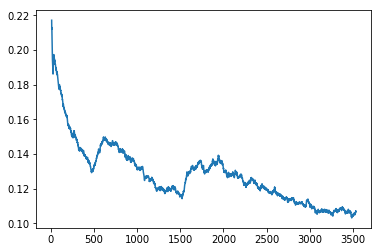

In [43]:
learn.sched.plot_loss()

In [44]:
sz=128
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.102888   0.101778   0.913338  
    1      0.105201   0.102823   0.912769  
    2      0.102306   0.099993   0.914552  
    3      0.107937   0.106439   0.913735  
    4      0.104859   0.101616   0.912409  
    5      0.104612   0.098366   0.916376  
    6      0.102215   0.098793   0.915206  



[array([0.09879]), 0.9152061692001343]

In [45]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

epoch      trn_loss   val_loss   f2         
    0      0.099564   0.092599   0.924181  
    1      0.103096   0.096739   0.919557  
    2      0.094436   0.090574   0.925647  
    3      0.108755   0.100491   0.914335  
    4      0.098926   0.092097   0.922851  
    5      0.09408    0.088409   0.927399  
    6      0.090626   0.087724   0.927766  



In [46]:
sz=256
learn.set_data(get_data(sz))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   f2         
    0      0.097353   0.093223   0.921125  
 60%|██████    | 304/506 [04:01<02:03,  1.64it/s, loss=0.105]

KeyboardInterrupt: 

In [ ]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{sz}')

In [47]:
5

5

In [48]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)

In [49]:
f2(preds, y)

0.9216814016484226